In [11]:
import pandas as pd
import numpy as np

file_url = "/content/drive/MyDrive/GDSC_dataset/df1.csv"
df2 = pd.read_csv(file_url)
df2

,EC_number,Substrate,UniProt_ID,Protein_file,Organism_name,Km_value (mM),pH,Temperature,Site_type,Substrate_SMILES,...,AACount_M,AACount_N,AACount_P,AACount_Q,AACount_R,AACount_S,AACount_T,AACount_V,AACount_W,AACount_Y
0,1.1.1.1,octanal,P00326,1U3W.pdb,Homo sapiens,9.6000,-----,21-23°C,Substrate+Cofactor,C(CCCCCCC)=O,...,14,24,40,14,20,48,44,78,4,8
1,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0400,-----,55°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,18,24,30,20,34,28,26,72,4,26
2,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0400,-----,55°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,18,24,30,20,34,28,26,72,4,26
3,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0400,-----,55°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,18,24,30,20,34,28,26,72,4,26
4,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0400,-----,55°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,18,24,30,20,34,28,26,72,4,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30030,6.4.1.3,propionyl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.0760,7.6,30°C,Substrate+Cofactor,C(CC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1[...,...,18,30,54,32,64,42,68,94,2,26
30031,6.4.1.3,butyryl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.1040,7.6,30°C,Substrate+Cofactor,C(CCC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1...,...,18,30,54,32,64,42,68,94,2,26
30032,6.4.1.3,butyryl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.1040,7.6,30°C,Substrate+Cofactor,C(CCC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1...,...,18,30,54,32,64,42,68,94,2,26
30033,6.5.1.1,ATP,A0A0A6YVN6,4D05.pdb,Psychromonas sp. SP041,0.0038,-----,30°C,Substrate_only,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,...,0,26,23,37,23,26,40,26,8,19


In [12]:
df2 = df2.drop_duplicates()

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler

In [6]:
structure_desc = ['RingCount', 'AromaticRings', 'HeteroAtoms', 'AliphaticRings', 'SaturatedRings', 'RotatableBonds',
                  'AmideBonds', 'HBD', 'HBA', 'NHOHCount', 'NumHeterocycles']

elec_desc = ['MolMR', 'TPSA', 'PEOE_VSA1', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8',
             'PEOE_VSA9', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'SMR_VSA1', 'SMR_VSA2', 'SMR_VSA3',
             'SMR_VSA4', 'SMR_VSA5']

desc = ['num_chains', 'num_residues', 'molecular_weight', 'isoelectric_point', 'instability_index', 'gravy', 'radius_of_gyration',
          'num_disulfide_bonds']

aa_desc = ['AACount_A', 'AACount_C', 'AACount_D', 'AACount_E', 'AACount_F', 'AACount_G', 'AACount_H', 'AACount_I',
           'AACount_K', 'AACount_L', 'AACount_M', 'AACount_N', 'AACount_P', 'AACount_Q', 'AACount_R',
           'AACount_S', 'AACount_T', 'AACount_V', 'AACount_W', 'AACount_Y']

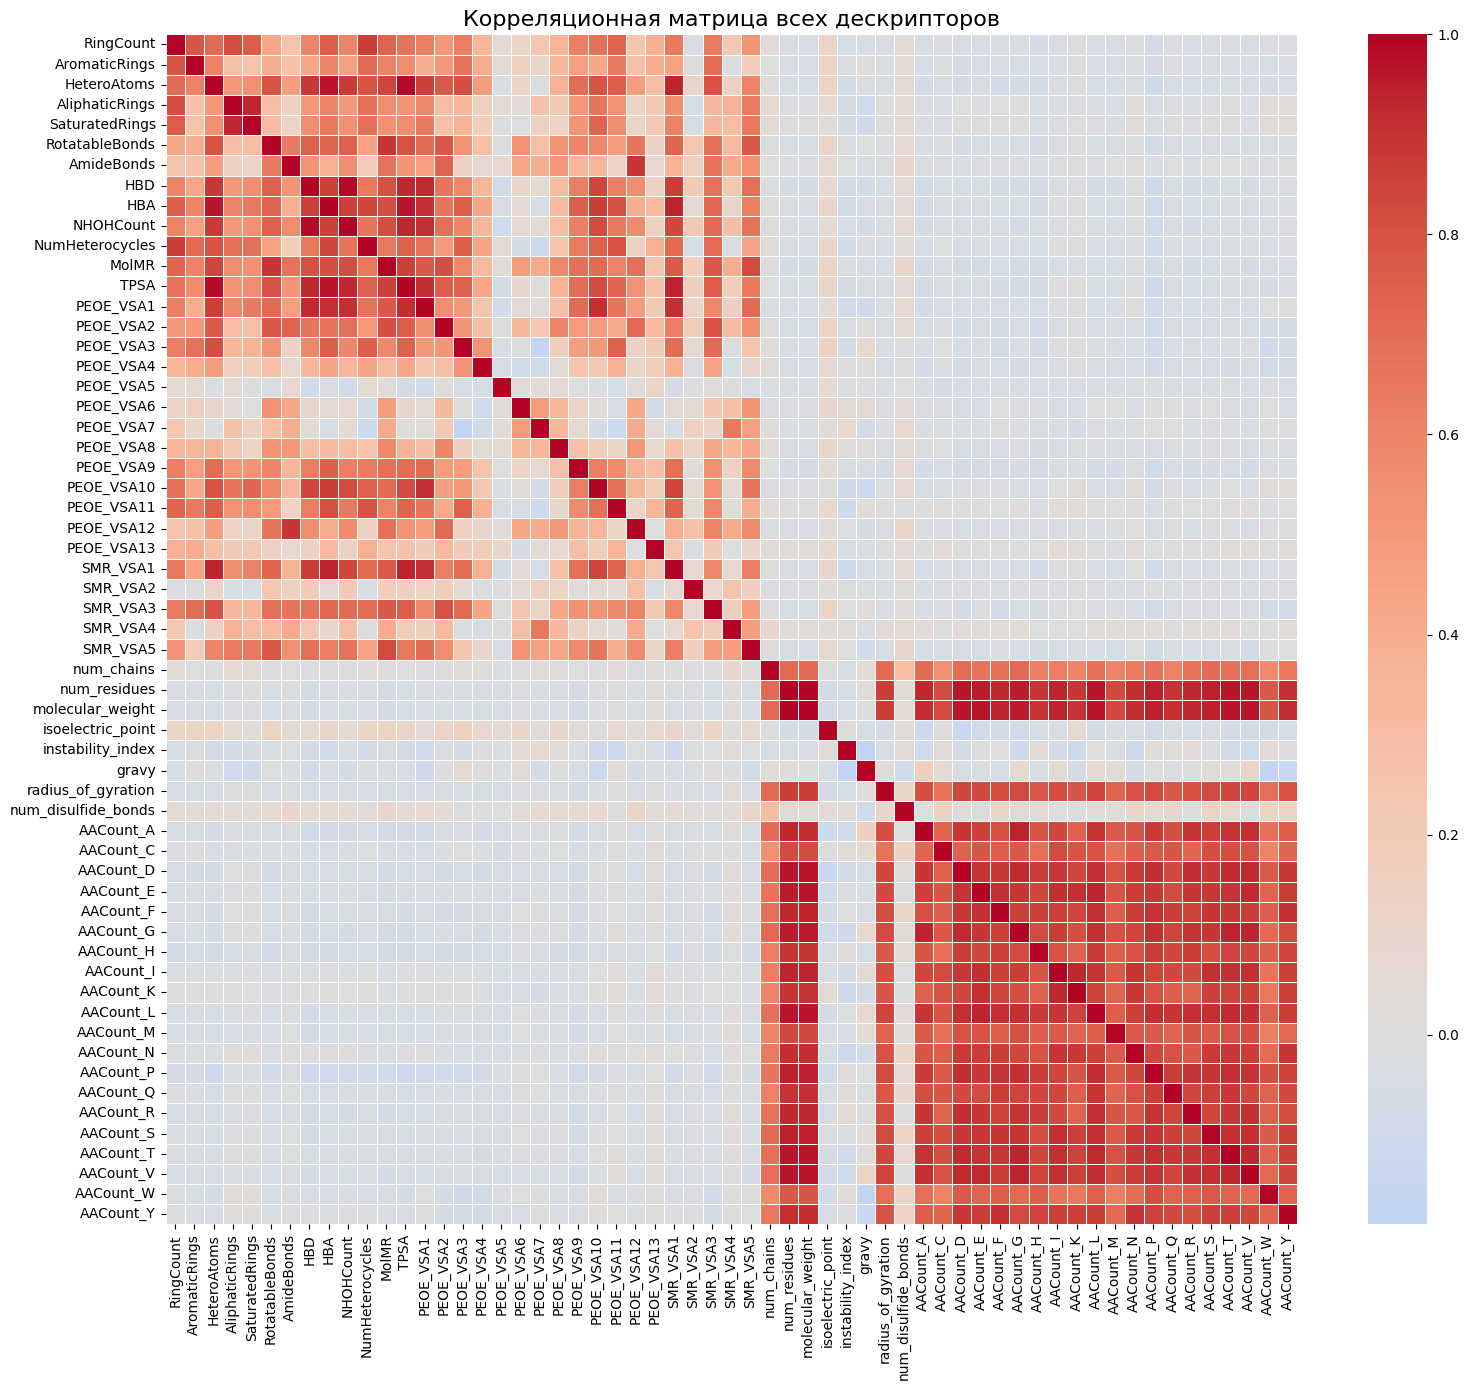

In [14]:
all_desc = structure_desc + elec_desc + desc + aa_desc
valid_cols = [col for col in all_desc if col in df2.columns]

corr_matrix = df2[valid_cols].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, linewidths=0.5)
plt.title('Корреляционная матрица всех дескрипторов', fontsize=16)
plt.tight_layout()
plt.show()

Построили тепловую матрицу для исследования связи между дескрипторами субстрата и фермента.
Наблюдается очень сильная положительная корреляция между дескрипторами, описывающими размер белка. Из-за высокой степени избыточности нельзя использовать все эти дескрипторы одновременно, необходимо провести отбор признаков.

In [18]:
#Отношение размера субстрата к массе фермента
df2['size_ratio'] = df2['MolMR'] / (df2['molecular_weight'] + 1e-6)

#Гибкость субстрата относительно длины белка
df2['flexibility_ratio'] = df2['RotatableBonds'] / (df2['num_residues'] + 1e-6)

#Потенциал ароматического взаимодействия (π–π)
df2['aromatic_match'] = df2['AromaticRings'] * (df2['AACount_F'] + df2['AACount_Y'] + df2['AACount_W'])

#Водородные связи — потенциальное число донор-акцепторных пар
df2['hb_potential'] = df2['HBD'] * df2['HBA']

#Гидрофобное соответствие (чем выше — тем более гидрофобный фермент и субстрат)
df2['hydrophobic_match'] = df2['gravy'] * (1 / (1 + df2['TPSA']))

df2

/tmp/ipython-input-112366743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['size_ratio'] = df2['MolMR'] / (df2['molecular_weight'] + 1e-6)
/tmp/ipython-input-112366743.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['flexibility_ratio'] = df2['RotatableBonds'] / (df2['num_residues'] + 1e-6)
/tmp/ipython-input-112366743.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,EC_number,Substrate,UniProt_ID,Protein_file,Organism_name,Km_value (mM),pH,Temperature,Site_type,Substrate_SMILES,...,AACount_S,AACount_T,AACount_V,AACount_W,AACount_Y,size_ratio,flexibility_ratio,aromatic_match,hb_potential,hydrophobic_match
0,1.1.1.1,octanal,P00326,1U3W.pdb,Homo sapiens,9.6000,-----,21-23°C,Substrate+Cofactor,C(CCCCCCC)=O,...,48,44,78,4,8,0.000497,0.008021,0.0,0.0,0.007783
1,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0400,-----,55°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,28,26,72,4,26,0.001888,0.015850,84.0,144.0,0.000052
7,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0100,10.5,65°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,28,26,72,4,26,0.001888,0.015850,84.0,144.0,0.000052
13,1.1.1.1,benzaldehyde,P39462,1R37.pdb,Saccharolobus solfataricus,0.0300,10.5,65°C,Substrate+Cofactor,C(C1=CC=CC=C1)=O,...,28,26,72,4,26,0.000424,0.001441,42.0,0.0,0.000925
19,1.1.1.1,Cyclohexanol,P39462,1R37.pdb,Saccharolobus solfataricus,0.0300,10.5,65°C,Substrate+Cofactor,C1(CCCCC1)O,...,28,26,72,4,26,0.000387,0.000000,0.0,1.0,0.000787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30027,6.4.1.2,ATP,Q00955,5CSL.pdb,Saccharomyces cerevisiae,0.0530,7.5,-----,Substrate+Cofactor,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,...,255,213,292,48,128,0.000206,0.001941,704.0,98.0,-0.000901
30029,6.4.1.3,propionyl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.0760,7.6,30°C,Substrate+Cofactor,C(CC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1[...,...,42,68,94,2,26,0.001581,0.019194,148.0,171.0,-0.000362
30031,6.4.1.3,butyryl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.1040,7.6,30°C,Substrate+Cofactor,C(CCC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1...,...,42,68,94,2,26,0.001622,0.020154,148.0,171.0,-0.000362
30033,6.5.1.1,ATP,A0A0A6YVN6,4D05.pdb,Psychromonas sp. SP041,0.0038,-----,30°C,Substrate_only,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,...,26,40,26,8,19,0.001705,0.016227,110.0,98.0,-0.001584


Создали комбинированные признаки, характеризующие совместимость фермента и субстрата:
* **Отношение размера субстрата к массе фермента** - признак количественно оценивает, какую долю от общего размера фермента составляет субстрат. Высокое значение: Субстрат относительно велик по сравнению с ферментом.
Низкое значение: Субстрат очень мал по сравнению с ферментом.
*  **Гибкость субстрата относительно длины белка** - Высокое значение: Субстрат обладает высокой гибкостью по отношению к размеру фермента.
Низкое значение: Субстрат является жёстким по отношению к размеру фермента.
* **Потенциал ароматического взаимодействия (π–π)** - он напрямую оценивает потенциал для π–π стэкинга — важного типа нековалентных взаимодействий. Высокое значение: Высокая вероятность сильного и специфичного связывания за счет π–π стэкинга. И фермент, и субстрат богаты ароматическими системами.
Низкое или нулевое значение: Ароматические взаимодействия не играют ключевой роли.
* **Водородные связи**- этот признак оценивает внутренний потенциал субстрата к образованию сложной сетки водородных связей. Высокое значение: Субстрат имеет высокий потенциал для формирования сложной сети водородных связей.
Этот признак характеризует только субстрат.
* **Гидрофобное соответствие** - Высокое значение: Хорошее совпадение по гидрофобности; оба компонента (фермент и субстрат) преимущественно гидрофобны.
Низкое значение: Плохое совпадение. Например, гидрофобный фермент и полярный субстрат.

In [19]:
pip install statannot

In [23]:
from scipy.stats import f_oneway
from statannot import add_stat_annotation

groups = [group['pKm_value'].dropna().values for name, group in df2.groupby('Organism_name') if len(group) > 3]
if len(groups) > 1:
  f_stat, p_val = f_oneway(*groups)
  print(f"\n ANOVA: F = {f_stat:.3f}, p = {p_val:.4e}")
  if p_val < 0.05:
    print("Различия между организмами статистически значимы (p < 0.05)")
  else:
     print("Значимых различий не выявлено (p ≥ 0.05)")


 ANOVA: F = 5.083, p = 3.4598e-123
Различия между организмами статистически значимы (p < 0.05)


Проанализировали влияние организма (Organism_name) на кинетические параметры с помощью однофакторного дисперсионного анализа. Вид организма оказывает значимое влияние на кинетические параметры.

In [24]:
from scipy.stats import f_oneway
from statannot import add_stat_annotation

groups = [group['pKm_value'].dropna().values for name, group in df2.groupby('EC_number') if len(group) > 3]
if len(groups) > 1:
  f_stat, p_val = f_oneway(*groups)
  print(f"\n ANOVA: F = {f_stat:.3f}, p = {p_val:.4e}")
  if p_val < 0.05:
    print("Различия между организмами статистически значимы (p < 0.05)")
  else:
    print("Значимых различий не выявлено (p ≥ 0.05)")


 ANOVA: F = 9.085, p = 0.0000e+00
Различия между организмами статистически значимы (p < 0.05)


Изучили зависимость Km от EC-класса фермента  с поомщью однофакторного дисперсионного анализа. Класс фермента оказывает значимое влияние на кинетические параметры.

In [25]:
df2.to_csv('df2.csv', index=False)